#   Практическая №6. Индивидульное задание.

Лазарев Александр. КМБО-03-22.

Вариант 22.

#   Определение качества вина.

---

# §1 Подготовка данных.

Установка данных.

In [324]:
# Избавимся от предупреждений из импортируемых библиотетк для лучшего представления работы.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Загрузка данных
data = pd.read_csv('winequality-red.csv')
features = data.columns.tolist() # Список имен признаков
data.head() # Ознакомление с данными (первые 5 строк) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Данные установлены корректно.

In [325]:
print("Строки \ столбцы")
print(*data.shape, sep=' \ ')

Строки \ столбцы
1599 \ 12


Все признаки + их число уникальных значений:
{'fixed acidity': 96}
{'volatile acidity': 143}
{'citric acid': 80}
{'residual sugar': 91}
{'chlorides': 153}
{'free sulfur dioxide': 60}
{'total sulfur dioxide': 144}
{'density': 436}
{'pH': 89}
{'sulphates': 96}
{'alcohol': 65}
{'quality': 6}


В наборе данных 1599 объектов и 12 признаков. 


In [326]:
data.info() # Проверим форматы признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Заметим, что все признаки являются числовыми, следовательно категориальных и бинарных признаков в датафрейме нет.

In [249]:
data.isnull().sum() # Проверяем количество пропущенных элементов

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропущенные значения отсутствуют.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Из данного ознакомления, а так же из описания, приведенного к датафрему, видно, что данные были специально отобранны для анализа и задач машинного обучения, следовательно в первом приближении факт наличия выбросов можно исключить.

Очевидно, что целевым признаком в этом набором служит quality (конечная оценка качества вина). Запишем его в целевую переменную и удалим из исходных данных.

Остальные признаки нормализуем через стандартное отклонение.

In [327]:
target = data['quality']

# Удаление целевого признака из данных
data.drop(columns=['quality'], inplace=True)

# нормировка признаков через стандартное отклонение
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)


---

# §2 Предсказание качества вина и оценка значимости параметров.

Поймем, какими методами лучше всего работать с данными.

### В первую очередь, оценим возможность применения кластеризации к данному датафрейму. ### 
Для этого воспользуемся методом локтя.

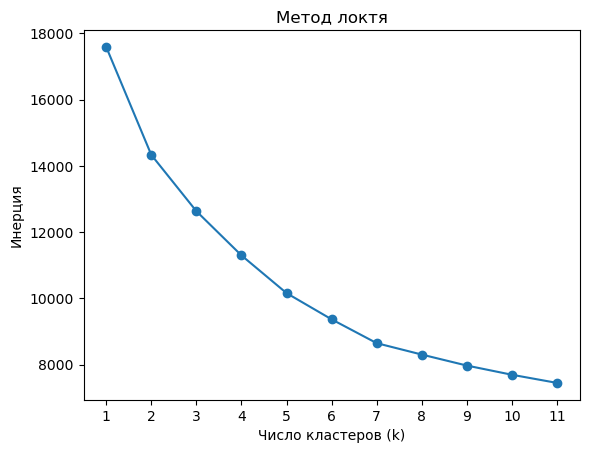

In [328]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Создание списка для сохранения значения инерции (сумма квадратов расстояний до ближайшего центроида) для разных значений k
inertia = []

# Задание разных значений k
k_values = range(1, 12)

# Вычисление инерции для каждого значения k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Построение графика локтя
plt.plot(k_values, inertia, marker='o')
# Задание шага сетки по оси x
plt.xticks(np.arange(1, 12, 1))
plt.xlabel('Число кластеров (k)')
plt.ylabel('Инерция')
plt.title('Метод локтя')
plt.show()



Видно, что график образует почти идеальную дугу, без четкого "локтя", что может означать, что изменение числа кластеров не сильно влияет на инерцию. В таком случае, использование метода локтя может быть не информативным.

В сложившейся ситуации может быть полезным рассмотреть другие методы для определения оптимального числа кластеров, например метод силуэта.

Метод силуэта используется для оценки качества кластеризации и помогает определить оптимальное число кластеров. Он основан на вычислении силуэтных коэффициентов для каждого объекта в выборке. При этом, чем ближе значение силуэтного коэффициента к 1, тем лучше кластеризация.

In [329]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Проведение кластеризации для разного числа кластеров
for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)
    
    # Вычисление среднего силуэтного коэффициента
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("Если число кластеров равно =", n_clusters, ", то среднее зачение силуэтных коэффициентов =", silhouette_avg)


Если число кластеров равно = 2 , то среднее зачение силуэтных коэффициентов = 0.2137299633548186
Если число кластеров равно = 3 , то среднее зачение силуэтных коэффициентов = 0.18921017006424395
Если число кластеров равно = 4 , то среднее зачение силуэтных коэффициентов = 0.20537478018609118
Если число кластеров равно = 5 , то среднее зачение силуэтных коэффициентов = 0.19029743601034466
Если число кластеров равно = 6 , то среднее зачение силуэтных коэффициентов = 0.19453023524467927
Если число кластеров равно = 7 , то среднее зачение силуэтных коэффициентов = 0.18984796085436983
Если число кластеров равно = 8 , то среднее зачение силуэтных коэффициентов = 0.1500073767393127
Если число кластеров равно = 9 , то среднее зачение силуэтных коэффициентов = 0.15377064858949194
Если число кластеров равно = 10 , то среднее зачение силуэтных коэффициентов = 0.15228246199879836
Если число кластеров равно = 11 , то среднее зачение силуэтных коэффициентов = 0.1324137374040649


In [334]:
target = target.apply(lambda x: 1 if x>=7 else 0)
print(max(target))

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

1


Разобьем данные на тренировочную и тестовую выборки.

In [330]:
import numpy as np



from sklearn.model_selection import train_test_split

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

Создадим классификатор типа логистической регрессии и используем его на данных наборах.

In [331]:
from sklearn.linear_model import LogisticRegression

# Создание объекта модели логистической регрессии
lr = LogisticRegression(max_iter=1000, random_state=42)

# Обучение классификатора на обучающей выборке
lr.fit(X_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = lr.predict(X_test)

Оценим точность построенного классификатора с помощью метрики accuracy с помоцью значений y_test тестовой выборки.

In [341]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

repoort = classification_report(y_test, y_pred)
print('classification report:\n', f1)

Accuracy: 0.903125
classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



Классификатор предсказал оценку качества вина с точностью почти в 88 процентов, что не может не радовать :)

Мы можем оценить вклад каждого признака в предсказания классификатора, основанного на логистической регрессии. Один из способов это сделать - это использовать коэффициенты модели, соответствующие каждой компоненте.

После обучения модели логистической регрессии, мы можем получить доступ к коэффициентам с помощью атрибута coef_ объекта классификатора. Этот атрибут содержит массив коэффициентов, где каждый элемент соответствует вкладу соответствующего признака/компоненты в предсказания модели.

#### Теоретическая вставка ####
Коэффициенты логистической регрессии отражают влияние каждого признака/компоненты на предсказание модели. Знак коэффициента указывает на направление влияния: положительное значение коэффициента означает, что увеличение значения признака/компоненты увеличивает вероятность отнесения к положительному классу (1), а отрицательное значение коэффициента означает, что увеличение значения признака/компоненты уменьшает вероятность отнесения к положительному классу.

Значение коэффициента по модулю отражает величину вклада: чем больше абсолютное значение коэффициента, тем сильнее признак/компонента влияет на предсказания модели. Если коэффициент близок к 0, это указывает на то, что соответствующая компонента не оказывает существенного влияния на предсказание.

In [333]:
# Получение коэффициентов модели
coefficients = lr.coef_

# Вывод вклада каждой компоненты
for i, feature_name in enumerate(features[:11]):
    print(f"Вклад компоненты {feature_name}: {coefficients[0][i]}")

Вклад компоненты fixed acidity: 0.3280382286113049
Вклад компоненты volatile acidity: 1.1208658228935013
Вклад компоненты citric acid: 0.16712950512227875
Вклад компоненты residual sugar: -0.14997820675777118
Вклад компоненты chlorides: 0.6941446034744119
Вклад компоненты free sulfur dioxide: 0.3822560413495285
Вклад компоненты total sulfur dioxide: -0.76360458940335
Вклад компоненты density: 0.7837142953415814
Вклад компоненты pH: 0.610953925038174
Вклад компоненты sulphates: -0.6631560266665076
Вклад компоненты alcohol: -0.9953305376708654


Больший влад в предсказания модели внес признак alcohol, при чем с с увеличением крепости вина, его оценка повышается. Хорошие вина - крепкие вина!
А вот кислотность/щелочность на предсказания практически не влияет. Из неожиданного: аромат и пикантность, которые вину добавляет лимонная кислота, оказались мало важны классификатору. Зачем пикантность, когда есть крепость?! Остальные признаки внесли ожидаемые и логные вклады в предсказание.

### Случайный лес ###

Проделаем те же действия, используя классификатор случайного леса и сравним показания.

#### Важное замечани и теоретическая втавка ####

Важность признаков в модели случайного леса (Random Forest) позволяет определить, насколько каждый признак влияет на предсказания модели. Важность признаков вычисляется на основе анализа поведения деревьев решений, объединенных в случайный лес.

В случайном лесе важность признаков определяется по тому, как сильно признак улучшает качество разделения в узлах деревьев и снижает неопределенность предсказания. Чем больше признак используется для разделения и снижения неопределенности, тем важнее он считается.

Важность признаков в модели случайного леса может быть вычислена с использованием атрибута feature_importances_, доступного после обучения модели. Этот атрибут содержит массив значений, где каждый элемент соответствует важности соответствующего признака.

Высокое значение важности признака означает, что этот признак является сильным предиктором и имеет большое влияние на предсказания модели. Низкое значение важности признака указывает на его меньшее влияние на предсказания модели.

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Создание объекта модели случайного леса
rf = RandomForestClassifier(random_state=16)

# Определение сетки гиперпараметров
param_grid = {'n_estimators': list(range(50, 1001, 50))} # число деревьев в лесу.
grid_search = GridSearchCV(rf, param_grid, refit='f1')
grid_search.fit(X_train, y_train)
print('Число деревьев для лучших значений метрик в первом приближении: ', grid_search.best_params_)

Число деревьев для лучших значений метрик в первом приближении:  {'n_estimators': 250}


In [347]:
best_clf.fit(X_train, y_train)

# Предсказание классов на той же тестовой выборке
y_pred = best_clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1:.2}')
print(f'Precision-score: {precision:.2}')
print(f'Recall-score: {recall:.2}')

# Получение важности каждого признака
importance = best_clf.feature_importances_
feature_and_importances = [(feature_name, i) for feature_name, i in zip(features[:11], importance)]
feature_and_importances.sort(reverse=True, key = lambda x : x[1])
# Вывод вклада каждой компоненты
for name, imp in feature_and_importances:
    print(f"Важность компоненты {name} в предсказание: {imp}")


F1-score: 0.62
Precision-score: 0.74
Recall-score: 0.53
Важность компоненты alcohol в предсказание: 0.1683683697381484
Важность компоненты sulphates в предсказание: 0.1176539226511102
Важность компоненты volatile acidity в предсказание: 0.11440319823242955
Важность компоненты density в предсказание: 0.09095262984935139
Важность компоненты citric acid в предсказание: 0.08609172850460088
Важность компоненты total sulfur dioxide в предсказание: 0.08277072781260766
Важность компоненты fixed acidity в предсказание: 0.0750798837314956
Важность компоненты chlorides в предсказание: 0.07462185551553169
Важность компоненты residual sugar в предсказание: 0.06767809488753608
Важность компоненты free sulfur dioxide в предсказание: 0.06334138308185172
Важность компоненты pH в предсказание: 0.059038205995336955


Наибольший вклад в предсказания по прежнему вносит крепость вина, однако вклад признака citric acid на фоне других явно вырос, по сравнению с классификатором логистической регрессии. Все же опираясь на кислотность/щелочность вина можно делать некоторые предсказания. Остальные параметры примерно сохранили свою статистическую значимость.

Анализ датафрема при помощи методов машинного обучения завершен.

---

# §3 Оценка статистических параметров. Гистограммы распределений. #

Изучим вклад каждой компоненты в качество вина более детально. Для этого проведем анализ гистограмм распределения каждого признака, оценим статистические характеристики для кажой парной регрессии вида "качество ~ признак" и исследуем выбросы данных при помощи ящика с усиками.

Для выполнения обозначенной задачи напишем функцию вывода всех необходимых результатов.

In [371]:
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display


    

# Наглядное представление изучаемой пары "качество ~ признак"
def plot_feature(X, feature, y):

    # Гистограмма распределения
    plt.figure(figsize=(2.8, 2.3))
    axes = sns.histplot(data=X, x=feature, bins=30, label="Гистограмма распределения")
    plt.show()
    
    # Ящик с усами
    plt.figure(figsize=(2.8, 2.3))
    axes = sns.boxplot(data=X, x=y, y=feature)
    axes.set(xlabel='quality', ylabel=feature, label="Ящик с усами")
    plt.show()
    
    # Масштабирование данных
    X1 = X[feature]
    X1 = (X1 - np.mean(X1)) / np.std(X1, axis=0)
    y1 = y
    y1 = (y1 - np.mean(y1, axis=0)) / np.std(y1, axis=0)

    # Создание модели линейной регрессии
    model = sm.OLS(y1, sm.add_constant(X1))

    # Обучение модели
    results = model.fit()
    conf = results.conf_int()
    conf_str = f"[{conf[1][0]:.5f}, {conf[1][1]:.5f}]"

    # Создание таблицы с результатами
    summary_table = pd.DataFrame({'Коэффициент': results.params,
                                  'Стандартная ошибка': results.bse,
                                  't-значение': results.tvalues,
                                  'P-значение': results.pvalues,
                                  'Доверительный интервал': conf_str})
    summary_table.drop(axis = 0, index = 'const', inplace=True)
    # Вывод таблицы с результатами
    display(summary_table)




Так как данные были сильно измененый входе манипуляций из предыдущих параграфов, загрузим их заново в перованачальном виде для более нагладного представления и изучения.

In [352]:
# Загрузка данных
data = pd.read_csv('winequality-red.csv')

#отделение целевого признака
target = data['quality']

# Удаление целевого признака из данных
data.drop(columns=['quality'], inplace=True)

Приступим к оценкам.

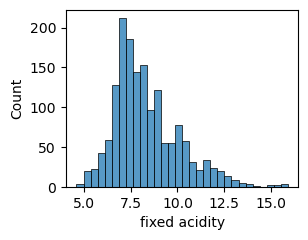

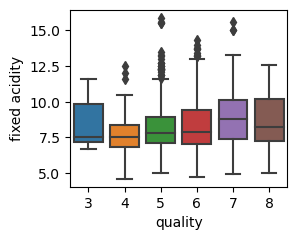

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
fixed acidity,0.124052,0.02483,4.996002,6.495635e-07,"[0.04870, 0.17275]"


In [370]:
plot_feature(data, 'fixed acidity', target)

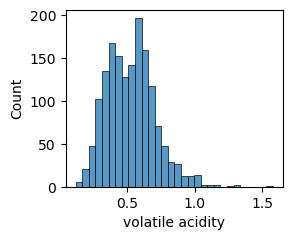

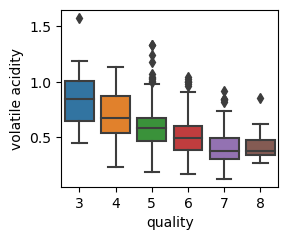

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
volatile acidity,-0.390558,0.023036,-16.954187,2.051715e-59,"[0.04518, -0.34537]"


In [374]:
plot_feature(data, 'volatile acidity', target)

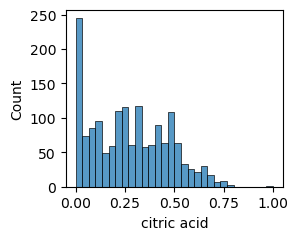

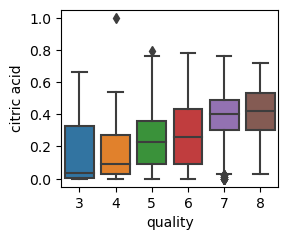

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
citric acid,0.226373,0.024374,9.287504,4.991295e-20,"[0.04781, 0.27418]"


In [377]:
plot_feature(data, 'citric acid', target)

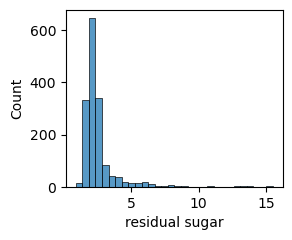

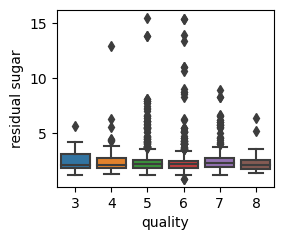

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
residual sugar,0.013732,0.025021,0.548802,0.583218,"[0.04908, 0.06281]"


In [381]:
plot_feature(data, 'residual sugar', target)

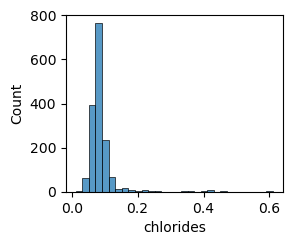

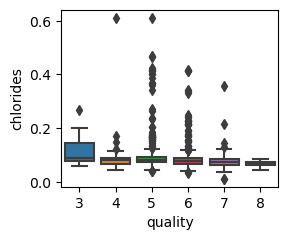

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
chlorides,-0.128907,0.024815,-5.194767,2.313383e-07,"[0.04867, -0.08023]"


In [380]:
plot_feature(data, 'chlorides', target)

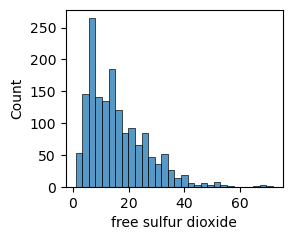

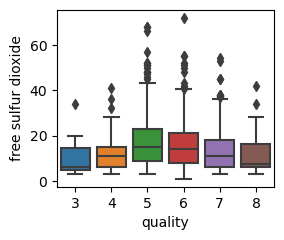

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
free sulfur dioxide,-0.050656,0.024991,-2.026944,0.042834,"[0.04902, -0.00164]"


In [382]:
plot_feature(data, 'free sulfur dioxide', target)

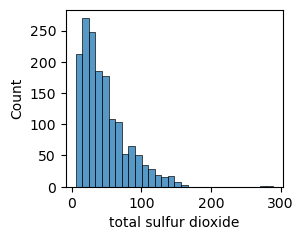

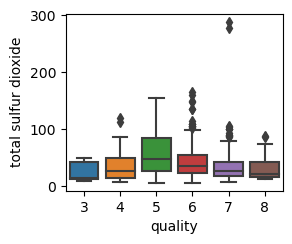

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
total sulfur dioxide,-0.1851,0.024591,-7.527139,8.621703e-14,"[0.04823, -0.13687]"


In [378]:
plot_feature(data, 'total sulfur dioxide', target)

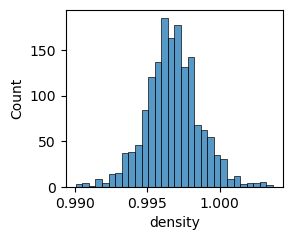

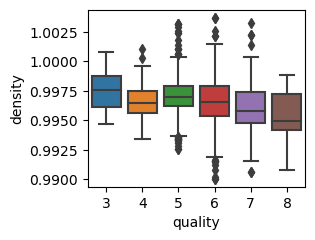

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
density,-0.174919,0.024638,-7.099664,1.874957e-12,"[0.04833, -0.12659]"


In [375]:
plot_feature(data, 'density', target)

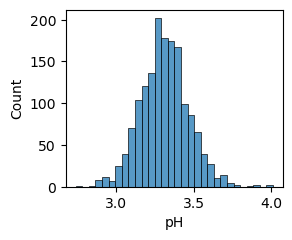

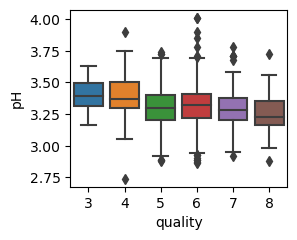

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
pH,-0.057731,0.024982,-2.310944,0.020963,"[0.04900, -0.00873]"


In [379]:
plot_feature(data, 'pH', target)

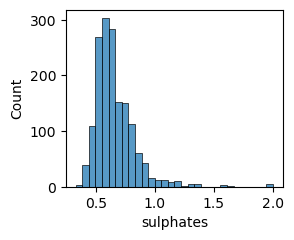

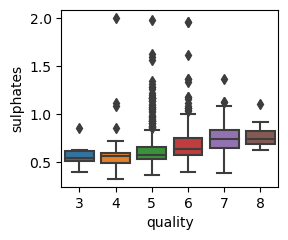

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
sulphates,0.251397,0.02422,10.379809,1.802088e-24,"[0.04751, 0.29890]"


In [373]:
plot_feature(data, 'sulphates', target)

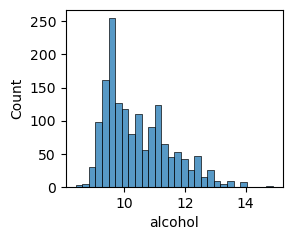

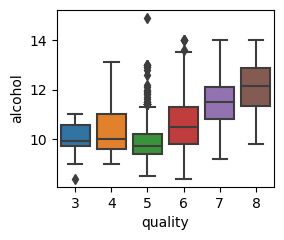

,Коэффициент,Стандартная ошибка,t-значение,P-значение,Доверительный интервал
alcohol,0.476166,0.022005,21.639478,2.831477e-91,"[0.04316, 0.51933]"


In [372]:
plot_feature(data, 'alcohol', target)